# **Project Data Science**

---



# **Exploratory Data Analysis (EDA)**

## 1. Import semua library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

## 2. Download Dataset

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "Heart_Disease_Indicators"

ref                                    title                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------  ------------------------  ----  -------------------  -------------  ---------  ---------------  
bhaveshmisra/heart-disease-indicators  Heart_Disease_Indicators   2MB  2023-10-06 18:08:16            923         30  0.9411765        


In [ ]:
!kaggle datasets download -d bhaveshmisra/heart-disease-indicators

 98% 2.00M/2.04M [00:00<00:00, 2.90MB/s]
100% 2.04M/2.04M [00:00<00:00, 2.58MB/s]


In [ ]:
file_ref = zipfile.ZipFile("/content/heart-disease-indicators.zip", "r")
file_ref.extractall('/content/sample_data')
file_ref.close()

## 3. Menampilkan Data

In [ ]:
df = pd.read_csv("/content/sample_data/heart_disease_health_indicators.csv")
df.sample(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
175499,0,0,0,1,28,0,0,0,1,1,...,1,0,2,0,1,0,1,7,6,1
141267,0,1,0,1,31,1,0,0,1,0,...,1,0,1,0,0,0,1,8,4,7
92223,0,1,0,1,27,0,0,0,1,0,...,1,0,4,0,3,0,1,13,4,3
44260,0,0,0,1,38,1,0,0,0,1,...,1,1,4,0,30,1,1,2,5,6
213869,0,1,1,1,26,0,0,0,1,1,...,1,0,1,0,0,0,1,12,6,6
3546,1,0,0,1,19,1,1,0,0,1,...,0,0,5,0,0,1,0,8,5,3
8532,0,1,1,1,29,1,0,0,1,0,...,1,0,2,0,0,0,1,9,6,8
99953,0,1,0,1,28,0,0,0,1,1,...,1,0,2,2,7,0,0,12,4,4
152045,0,0,0,1,36,0,0,0,0,0,...,1,0,3,2,5,0,0,2,6,6
146802,0,1,1,1,23,1,0,0,1,1,...,1,0,1,0,1,0,0,9,5,7


## 4. Menganalisis Karakteristik Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,...,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000,253661.000000
mean,0.094173,0.428990,0.424113,0.962667,28.382475,0.443186,0.040570,0.296904,0.756577,0.634264,...,0.951049,0.084164,2.511379,3.184778,4.242028,0.168221,0.440348,8.032197,5.050461,6.054052
std,0.292070,0.494933,0.494209,0.189578,6.608638,0.496763,0.197292,0.698147,0.429149,0.481637,...,0.215766,0.277633,1.068472,7.412822,8.717905,0.374063,0.496430,3.054203,0.985718,2.071036
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## 5. Menentukan Kelas Target

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
y

0         0
1         0
2         0
3         0
4         0
         ..
253656    0
253657    0
253658    0
253659    0
253660    0
Name: HeartDiseaseorAttack, Length: 253661, dtype: int64

## 6. Mengevaluasi Keseimbangan Target (y) dengan SMOTE


In [ ]:
y.value_counts()

0    229773
1     23888
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
smote = SMOTE(random_state=42)
X_new , y_new = smote.fit_resample(np.array(X), np.array(y))

In [ ]:
y_new = y_new.reshape(-1,1)
y_new.shape

(459546, 1)

In [ ]:
df.columns[1:]

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [ ]:
df.columns[0]

'HeartDiseaseorAttack'

In [ ]:
df = pd.concat([pd.DataFrame(X_new,columns=['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income']), pd.DataFrame(y_new,columns=["HeartDiseaseorAttack"])], axis=1)

In [ ]:
df.shape

(459546, 22)

In [ ]:
df_jantung = df.query("`HeartDiseaseorAttack` = 1")

## 7. Visualisasi Data

# **Data Preparation**

## 1. Analisis Korelasi

<Axes: >

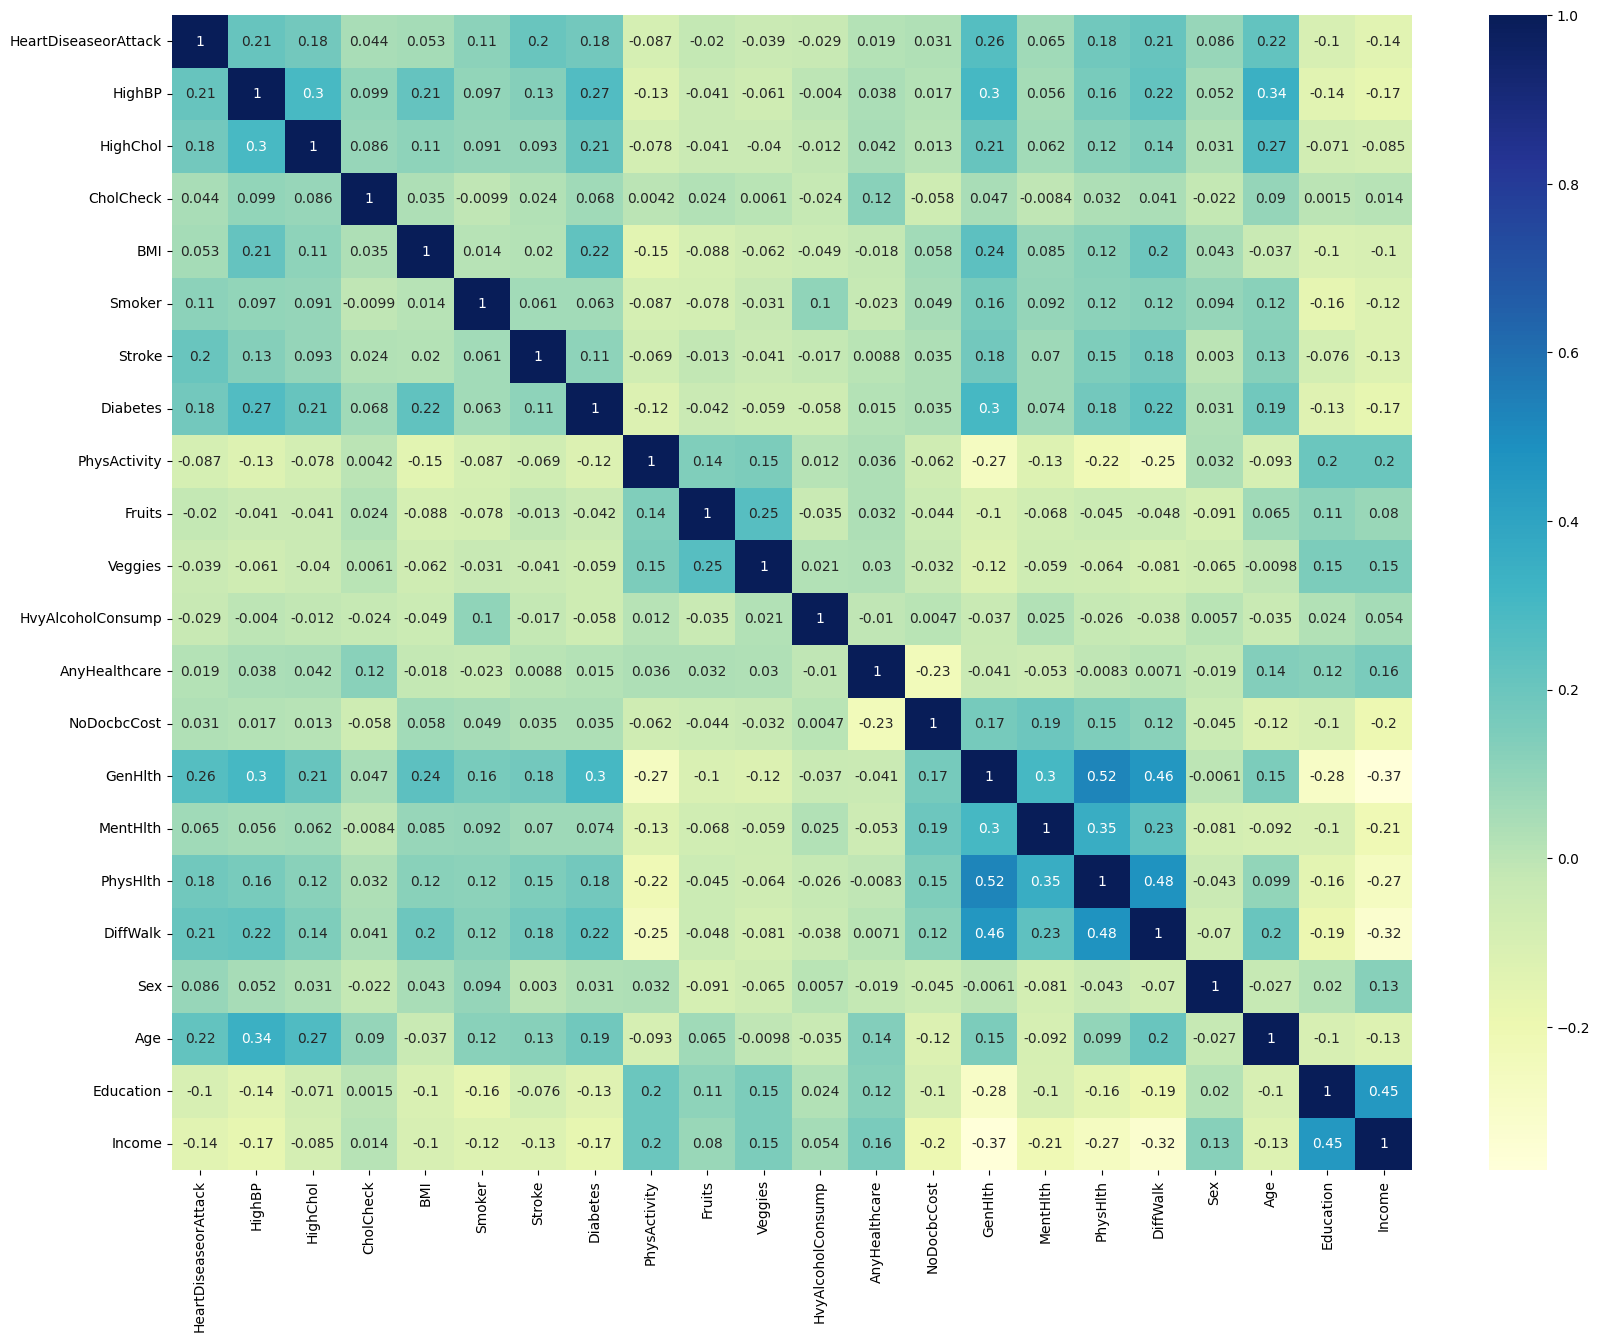

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

## 2. Seleksi Fitur

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.nlargest(10,'Score').sort_values(by=["Score"], ascending=False)

,Specs,Score
15,PhysHlth,150124.675582
14,MentHlth,18282.290230
18,Age,14464.630295
6,Diabetes,13524.938776
5,Stroke,10026.907447
16,DiffWalk,9545.455127
13,GenHlth,7698.105232
0,HighBP,6347.907868
1,HighChol,4772.192259
20,Income,3571.164469


In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.0280163  0.02324088 0.00402566 0.19062323 0.01717536 0.02680546
 0.02539979 0.02558542 0.02984828 0.02498188 0.00816933 0.00822152
 0.01570895 0.06808736 0.07115335 0.0896953  0.02757195 0.01972471
 0.11561576 0.07776787 0.10258163]


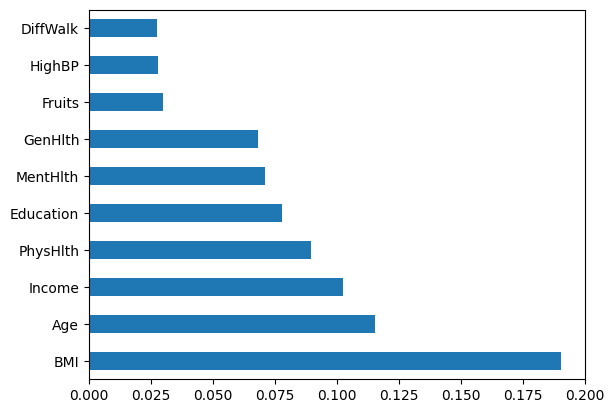

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index

array([[<Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'cente

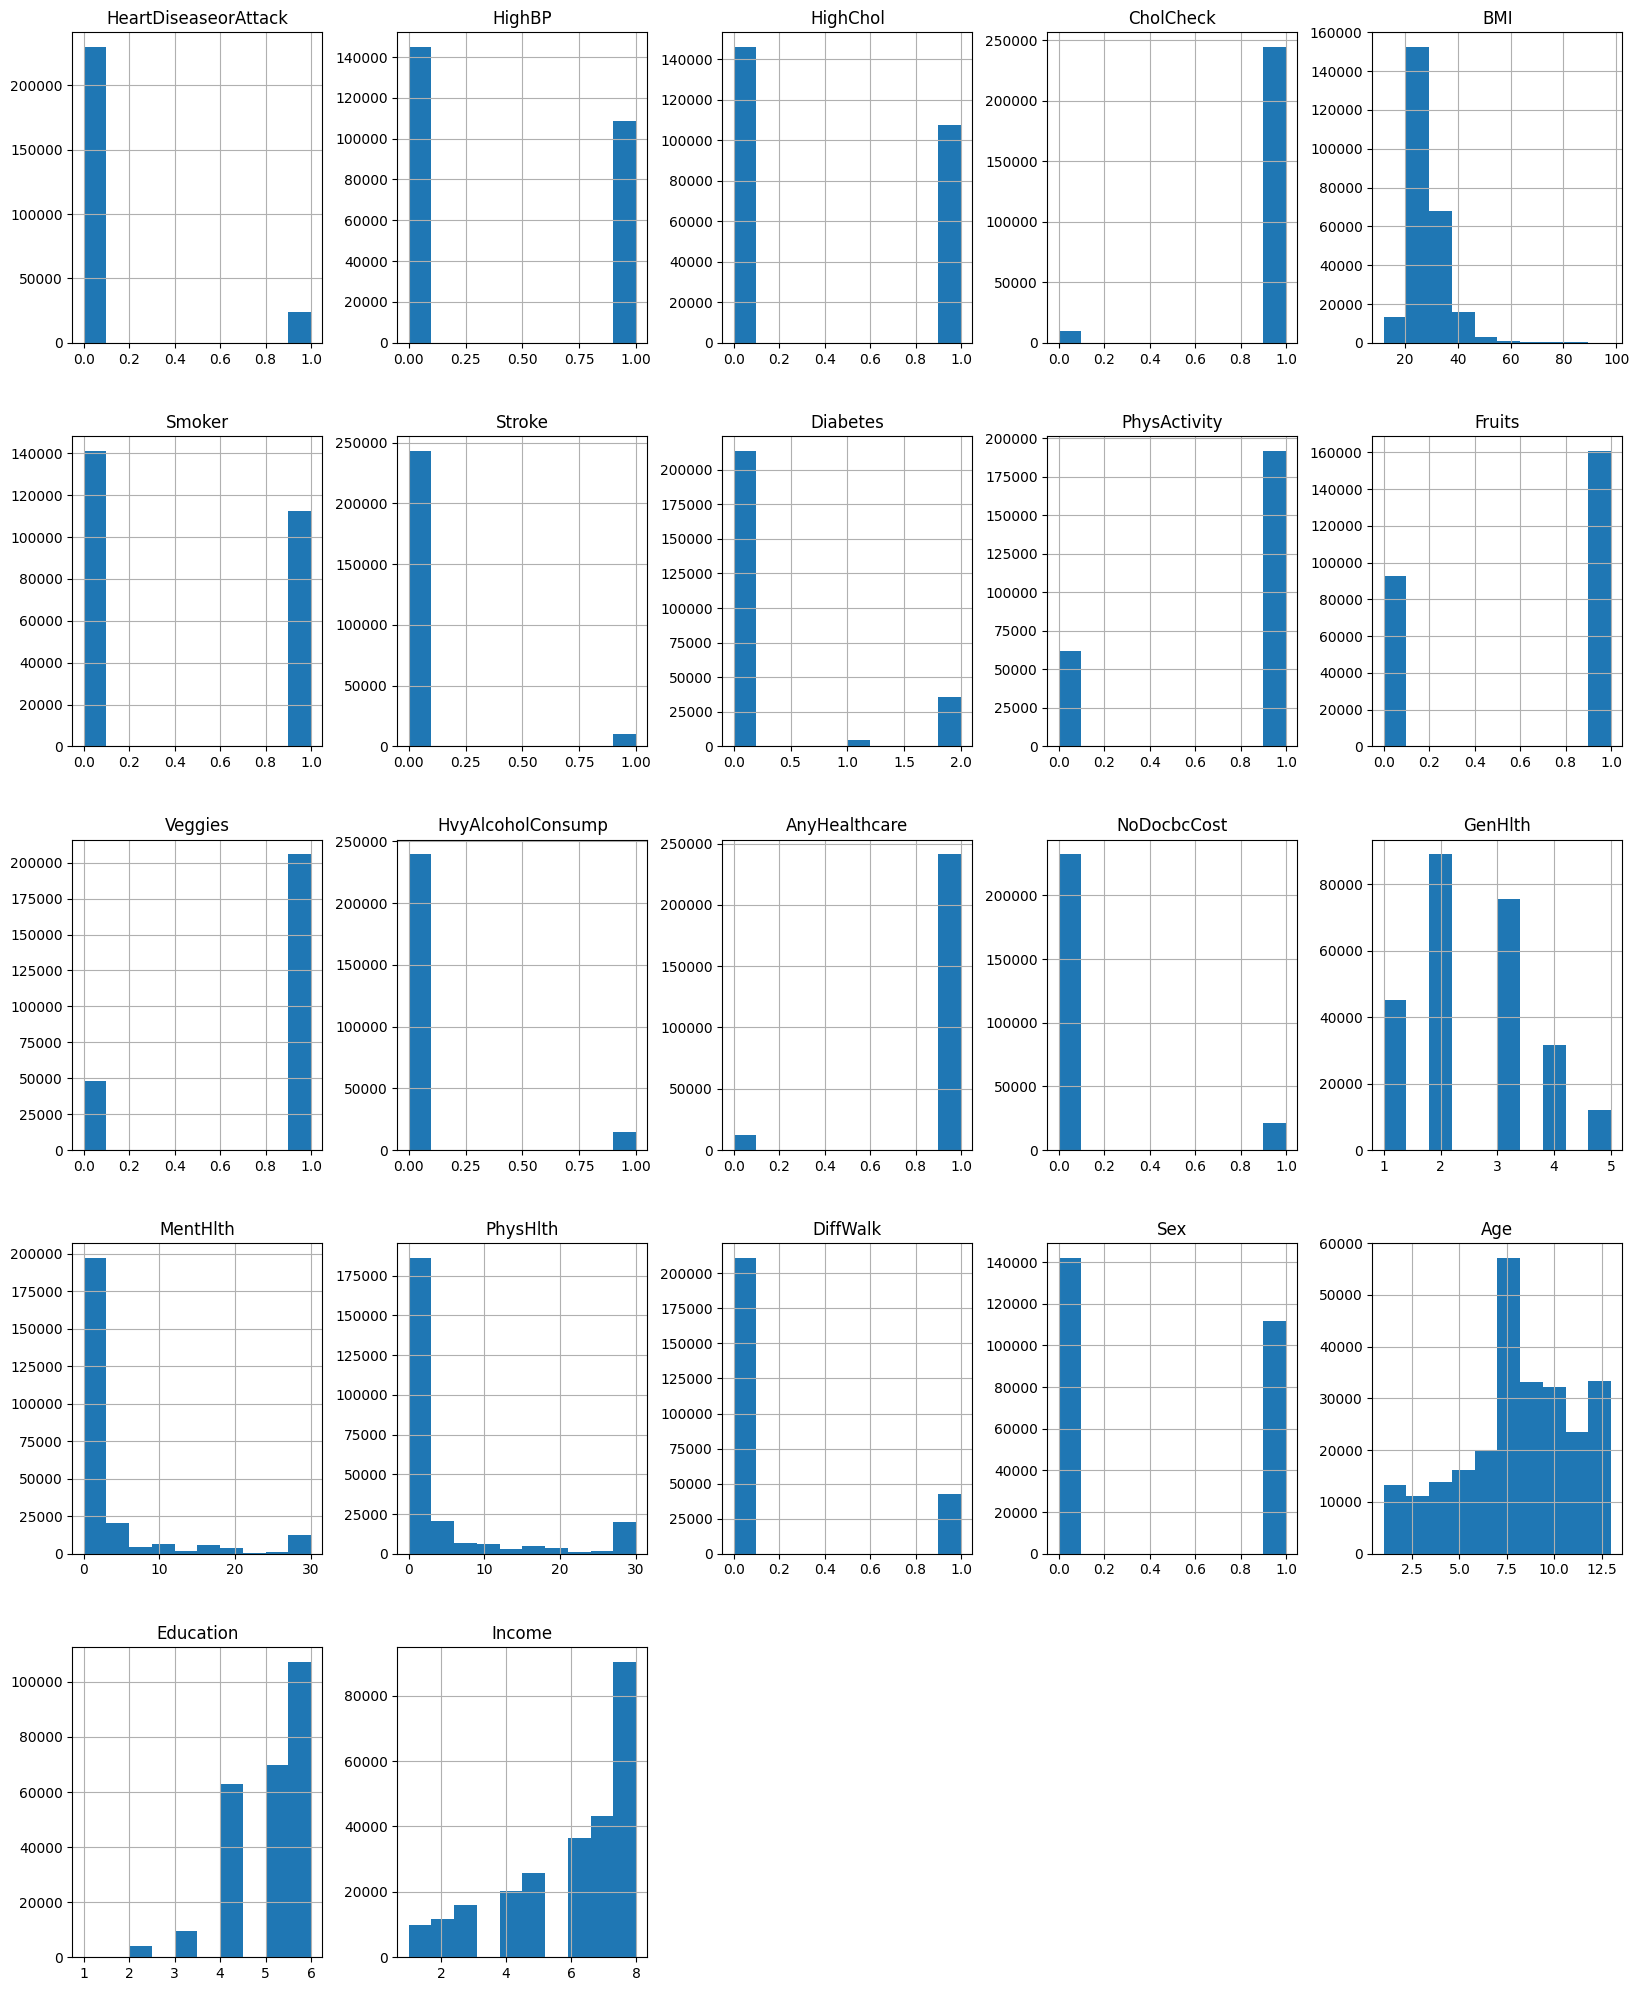

In [ ]:
df.hist(figsize=(20,25))

In [ ]:
scaler = RobustScaler()
dfScaled = scaler.fit_transform(np.array(df.iloc[:,:-1]).reshape(-1,1)).reshape(df.iloc[:,:-1].shape)

In [ ]:
X_scl = dfScaled
y_scl = df['Class']

In [ ]:
X_train_scl, X_test_scl, y_train_scl, y_test_scl = train_test_split(X_scl, y_scl, random_state=42, test_size=0.2)

In [ ]:
models = {
    "Tree" : DecisionTreeClassifier(random_state=42),
    "NB" : GaussianNB(),
    "KNN" : KNeighborsClassifier(),
    "RF" : RandomForestClassifier(random_state=42),
    "SVM" : SVC(random_state=42),
    "XGB": XGBClassifier()
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
main_score = []

for nama, model in models.items():
    score = cross_val_score(model, X_train_scl , y_train_scl, cv=kfold, scoring='accuracy')
    main_score.append(score)
    print(f"{nama} -- {score} dengan score rata-rata {score.mean()}")